In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Goleo8/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1. Linear Regression

In [9]:
X=np.linspace(0,20,30)
y=X*2+np.random.randn(X.shape[0])

In [3]:
lr=LinearRegression()
lr.fit(X.reshape(X.shape[0],1),y.reshape(y.shape[0],1))
print(lr.coef_)
print(lr.intercept_)

[[2.00366856]]
[-0.14318764]


/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [4]:
y_pred=lr.predict(X.reshape(X.shape[0],1))

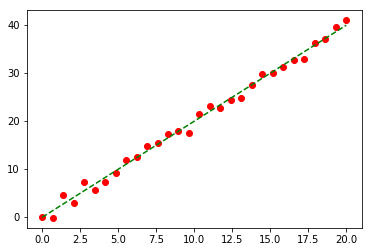

In [5]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,'g--')
plt.show()

In [20]:
X1=np.random.randn(100,5)

In [21]:
a=np.array([3,4,5,2,1])
a=a.reshape(a.shape[0],-1)

In [22]:
y=np.dot(X1,a)

In [23]:
lr.fit(X1,y)
print(lr.coef_)
print(lr.intercept_)

[[3. 4. 5. 2. 1.]]
[2.77555756e-16]


#### 1.1 Linear Regression Resolved by Normal Equation

In [25]:
w1=np.dot(np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T),y)
print(w1)

[[3.]
 [4.]
 [5.]
 [2.]
 [1.]]


In [36]:
w2=np.zeros((5,1))
w2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

#### 1.2 Gradient Descent

In [38]:
lrate=.01
for i in range(1000):
    w2=w2-lrate*np.dot(X1.T,(np.dot(X1,w2)-y))
    if (i+1)%100==0:
        print(w2.reshape(1,5))

[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]


#### 1.3 Stochastic Gradient Descent

In [48]:
w3=np.zeros((5,1))
lrate=.01
for index in range(1000):
    for i in range(X1.shape[0]):
        x_i=X1[i,:].reshape(1,-1)
        y_i=y[i]
        w2=w2-lrate*np.dot(x_i.T,(np.dot(x_i,w2)-y_i))
    if (index+1)%100==0:
        print(w2.reshape(1,5))

[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]


### 2. Classification
#### 2.1 Logistic Regression  

In [7]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem=Memory("./memcache")

@mem.cache

def get_data(file):
    data = load_svmlight_file(file)
    return data[0],data[1]

In [8]:
X,y=get_data('../data/part.txt')

________________________________________________________________________________
[Memory] Calling __main__--Users-Goleo8-Dev-Workspace-Repository-AI-Machine Learning-__ipython-input__.get_data...
get_data('../data/part.txt')
_________________________________________________________get_data - 0.0s, 0.0min


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [34]:
logistic_r=LogisticRegression(penalty='l1',max_iter=150)
logistic_r.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_pred=logistic_r.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [36]:
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[102  26]
 [ 41  55]]
0.7132867132867133
0.796875
0.7527675276752768


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()
lda.fit(X_train.toarray(),y_train)

/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [40]:
y_pred=lda.predict(X_test.toarray())

In [41]:
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[81 47]
 [47 49]]
0.6328125
0.6328125
0.6328125


#### Softmax

In [11]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(penalty='l1',multi_class='multinomial',solver='saga')

In [3]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=42)

In [12]:
logR.fit(X_train,y_train)

/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred=logR.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [15]:
print(logR.coef_)

[[ 0.25992705  2.01294316 -2.62227897 -0.15219682]
 [ 0.          0.          0.         -0.1964916 ]
 [-1.79616488 -1.86215153  2.89739178  2.74429442]]


In [16]:
logR.predict_proba(X_test)

array([[3.54144636e-03, 8.30603039e-01, 1.65855515e-01],
       [9.86323784e-01, 1.36762054e-02, 1.03559861e-08],
       [5.78529262e-08, 4.08370668e-03, 9.95916235e-01],
       [6.81079729e-03, 7.82958833e-01, 2.10230370e-01],
       [3.48044886e-03, 8.76729093e-01, 1.19790459e-01],
       [9.80622121e-01, 1.93778392e-02, 3.98191383e-08],
       [7.44924348e-02, 9.05101602e-01, 2.04059629e-02],
       [1.10338094e-03, 3.12423163e-01, 6.86473456e-01],
       [1.32295663e-03, 5.90822031e-01, 4.07855012e-01],
       [2.46296191e-02, 9.37311594e-01, 3.80587868e-02],
       [1.50506757e-03, 3.91812043e-01, 6.06682890e-01],
       [9.61278126e-01, 3.87217219e-02, 1.52505832e-07],
       [9.90686568e-01, 9.31342832e-03, 4.12971177e-09],
       [9.59956381e-01, 4.00434725e-02, 1.46156114e-07],
       [9.90499129e-01, 9.50085917e-03, 1.18403126e-08],
       [1.05043864e-02, 8.39859644e-01, 1.49635970e-01],
       [1.30168240e-05, 3.14927323e-02, 9.68494251e-01],
       [1.53818563e-02, 9.26355

# ToDos

#### Classification

* Parametric learning algorithm
* Non-parametric learning algorithm

#### Locally Weighted Regression


fit $\theta$ to minimize
$\sum_i{w^{(i)}}(y^{(i)}-\theta^{T} *x^{(i)})^2$

\begin{equation}
w^{(i)}=\exp(-\frac{(x^{(i)}-x)^2}{2*\tau^2})
\end{equation}

 
### Perception Algorithm   
### Newton Method